## Уравнение переноса


Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

### Линейное уравнение переноса

Уравнение переноса &mdash; простейшее уравнение гиперболического типа. Неизвестной является функция $u(t, x)$.

$$\begin{aligned}
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = f(t, x), \qquad c > 0, \; c = \operatorname{const}
\end{aligned}\\
u\big|_{t=0} = u_0(x)
$$

Физический смысл решения &mdash; перенос начального профиля решения с постоянной скоростью $c$ вправо:
$$
u(t, x) = u_0(x - c t)
$$

Описывает, например, перенос загрязнения в равномерном течении жидкости или динамику плотности машин на дороге.

### Сетка

При переходе к уравнениям в частных производных сетка становится многомерной:

<img src="grid.png" style="height:400px">

Верхний индекс $n$ означает номер слоя по времени, а нижний индекс $m$ означает номер узла по пространству. Также шаг по времени принято обозначать $\tau$, а по пространственной переменной &mdash; $h$.

### Шаблон разностной схемы

Пусть для вычисления $u^{n+1}_m$ требуются значения сеточной функции $u$ в нескольких узлах. Тогда вместе с узлом $(n+1, m)$ они образуют *шаблон разностной схемы*. Шаблон удобно изображать графически, например, ниже приведен шаблон схемы «явный левый уголок».

<img src="stencil.png" style="height:200px">

Некоторые выводы о разностной схеме можно сделать изучив только ее шаблон.

### Условие Куранта-Фридрихса-Леви

Все уравнения гиперболического типа имеют характеристики. Для уравнения переноса
$$
u_t + c u_x = 0
$$
характеристиками будут линии
$$
dx - c dt = 0 \Leftrightarrow x - ct = \operatorname{const}
$$
Условие Куранта-Фридрихса-Леви запрещает схемам быть устойчивыми, если характеристика, выпущенная из расчетного узла выходит за пределы шаблона разностной схемы.

<img src="cfl.png" style="height:200px">

### Некоторые схемы для уравнения переноса

* Явный левый уголок
$$
\frac{u^{n+1}_m - u^n_m}{\tau} + c \frac{u^n_m - u^n_{m-1}}{h} = f^n_m
$$

* Явный правый уголок
$$
\frac{u^{n+1}_m - u^n_m}{\tau} + c \frac{u^n_{m+1} - u^n_m}{h} = f^n_m
$$

* Схема с центральной разностью
$$
\frac{u^{n+1}_m - u^n_m}{\tau} + c \frac{u^n_{m+1} - u^n_{m-1}}{2h} = f^n_m
$$

* Схема Лакса
$$
\frac{u^{n+1}_m - \frac{1}{2}\left(u^n_{m-1} + u^n_{m+1}\right)}{\tau} + c \frac{u^n_{m+1} - u^n_{m-1}}{2h} = f^n_m
$$

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def solve(u0, g, method, M=200, courant=0.5):
    X = np.linspace(0, 1, M+1); h = X[1] - X[0]
    print('Метод:', method.name)
    print('Число Куранта cт/h =', courant)
    tau = courant * h # Скорость с = 1
    u = u0(X) # Начальное условие
    t = 0; tmax = 0.6
    while t < tmax:
        if t + tau > tmax: tau = tmax - t + 1e-14
        unext = np.empty_like(u)
        unext[0] = g(t+tau)
        unext[1:] = method(u, tau, h)
        u = unext
        t += tau
    print('t =', t)
    return X, u

In [63]:
def upwind(u, tau, h):
    sigma = tau/h
    return sigma*u[:-1] + (1-sigma)*u[1:]
upwind.name = 'Левый уголок'

def central(u, tau, h):
    sigma = tau/h
    return np.append(
        u[1:-1] - sigma/2 * (u[2:] - u[:-2])
        , [sigma*u[-2] + (1-sigma)*u[-1]])
central.name = 'Центральная разность'

def lax(u, tau, h):
    sigma = tau/h
    return np.append(
        (0.5 + sigma/2) * u[:-2] + (0.5 - sigma/2) * u[2:]
        , [sigma*u[-2] + (1-sigma)*u[-1]])
lax.name = 'Схема Лакса'

In [64]:
def step(x): # Начальное условие - ступенька
    return np.double(x < 0.2)

def g(t): # Левое граничное условие
    return 1.0

Метод: Левый уголок
Число Куранта cт/h = 0.5
t = 0.6


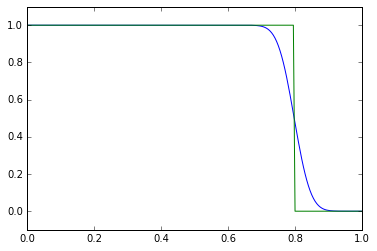

In [65]:
X, u_upwind = solve(step, g, upwind, courant=0.5)
plt.plot(X, u_upwind)
plt.plot(X, step(X - 0.6))
plt.ylim(-0.1, 1.1)
plt.show()

Метод: Центральная разность
Число Куранта cт/h = 0.01
t = 0.6


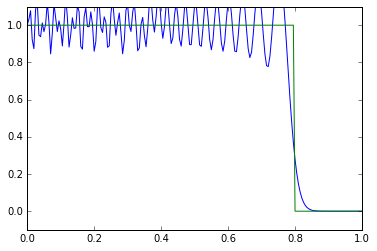

In [67]:
X, u_upwind = solve(step, g, central, courant=0.01)
plt.plot(X, u_upwind)
plt.plot(X, step(X - 0.6))
plt.ylim(-0.1, 1.1)
plt.show()

Метод: Схема Лакса
Число Куранта cт/h = 0.5
t = 0.6


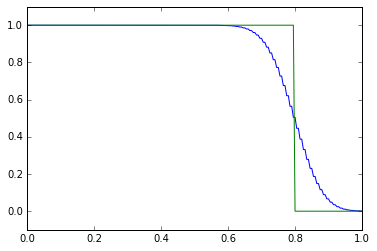

In [68]:
X, u_upwind = solve(step, g, lax, courant=0.5)
plt.plot(X, u_upwind)
plt.plot(X, step(X - 0.6))
plt.ylim(-0.1, 1.1)
plt.show()